# 랜덤 포레스트

In [29]:
from sklearn.datasets import load_iris, load_boston
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

## 시각화

In [30]:
iris = load_iris()

In [31]:
model = DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

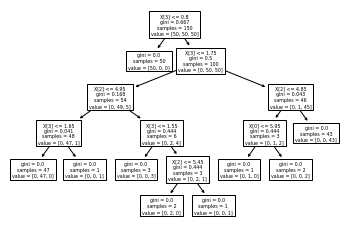

In [32]:
from sklearn.tree import export_text
r = export_text(decision_tree=model, feature_names=iris.feature_names)
print(r)

from sklearn.tree import plot_tree
plot_tree(model)

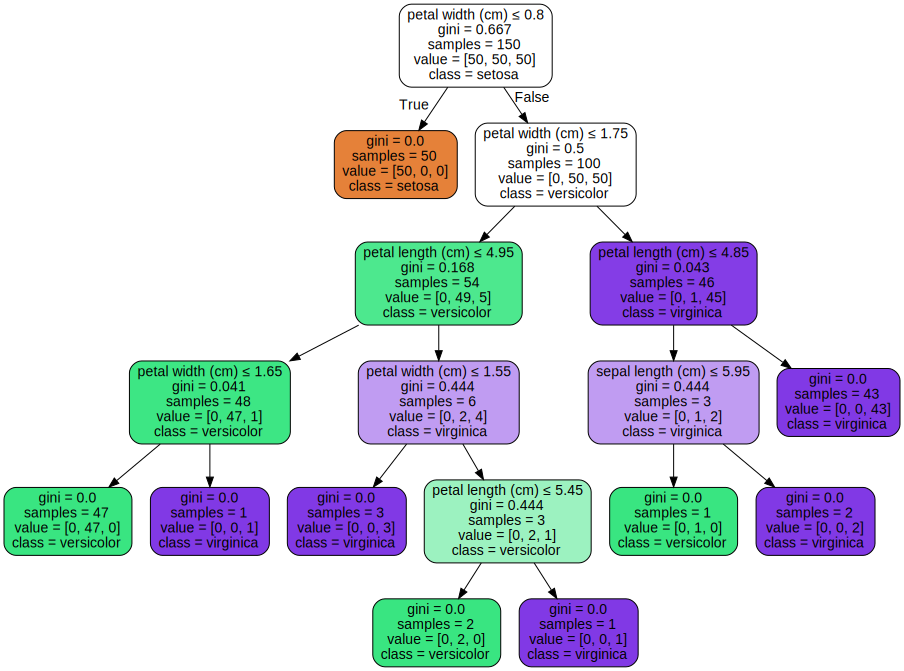

In [33]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(decision_tree = model,
                           feature_names = iris.feature_names,
                           class_names = iris.target_names,
                           filled = True,
                           rounded = True,
                           special_characters = True)
graph = graphviz.Source(dot_data)
graph

## 결정 트리

In [34]:
from sklearn.model_selection import cross_val_score

### 분류

In [35]:
iris = load_iris()
model = DecisionTreeClassifier()
cross_val_score(estimator = model, X = iris.data, y = iris.target, cv = 5)

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [36]:
model.fit(iris.data, iris.target)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 회귀

In [37]:
boston = load_boston()
model = DecisionTreeRegressor()
cross_val_score(estimator = model, X = boston.data, y = boston.target, cv = 5)

array([ 0.57587172,  0.42257898,  0.63979981,  0.38770256, -1.4651265 ])

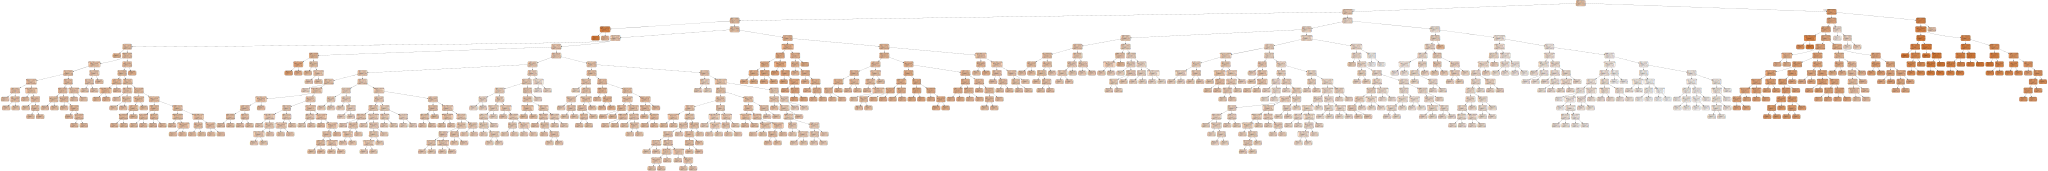

In [38]:
model.fit(boston.data, boston.target)
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(decision_tree = model, 
                            feature_names = boston.feature_names,
                           filled = True,
                           rounded = True)
graph = graphviz.Source(dot_data)
graph

## 랜덤 포레스트

In [39]:
iris = load_iris()
model = RandomForestClassifier()
cross_val_score(estimator = model, X = iris.data, y = iris.target, cv = 5)

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

In [40]:
boston = load_boston()
model = RandomForestRegressor()
cross_val_score(estimator = model, X = boston.data, y = boston.target, cv = 5)

array([0.77166747, 0.86259663, 0.78056007, 0.46897307, 0.36725174])